Убыль клиентов, также известная как отток клиентов, текучесть кадров или уход клиентов, - это потеря клиентов. Компании часто используют анализ убыли клиентов и показатели выбытия клиентов в качестве одного из ключевых бизнес-показателей, поскольку затраты на удержание существующего клиента намного меньше, чем затраты на привлечение нового.

Проанализируем датасет, содержащий информацию об оттоке пользователей телекоммуникационных компаний, и обучим модель для предсказания оттока клиента по ряду факторов.

##Подключение библиотек

In [12]:
# Основные библиотеки
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Энкодеры
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [14]:
# Модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
# Обработка и метрики
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score,\
f1_score, accuracy_score, classification_report

##Загрузка датасета

В качестве размеченных данных будем использовать датасет *WA_Fn-UseC_-Telco-Customer-Churn* с платформы *Kaggle* (https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download).

Датасет загружен на личный-гугл диск и импортируется в ноутбук оттуда.

In [7]:
!gdown 1m5FpHSZOundNn5r1KCde250MgZxjrtw7

Downloading...
From: https://drive.google.com/uc?id=1m5FpHSZOundNn5r1KCde250MgZxjrtw7
To: /content/Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 83.4MB/s]


In [9]:
df = pd.read_csv('Telco-Customer-Churn.csv')

##Разведочный анализ

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента, описанные в методанных столбца.

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Набор данных включает в себя:**

* **Информацию о клиентах, которые ушли в течение последнего месяца** – столбец называется "Churn"
* **Услуги, на которые подписался каждый клиент** – телефон, несколько линий, интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройств, техническая поддержка и потоковое телевидение и фильмы
* **Информация об учетной записи клиента** - как долго он был клиентом, контракт, способ оплаты, безбумажное выставление счетов, ежемесячные платежи и общая сумма платежей
* **Демографическая информация о клиентах** – пол, возрастной диапазон, а также наличие у них партнеров и иждивенцев

In [18]:
df.shape

(7043, 21)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [22]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Столбец, который мы будем предсказывать при исследовании, - это отток (*Churn*)

**Проверка пропущенных значений**

<Axes: >

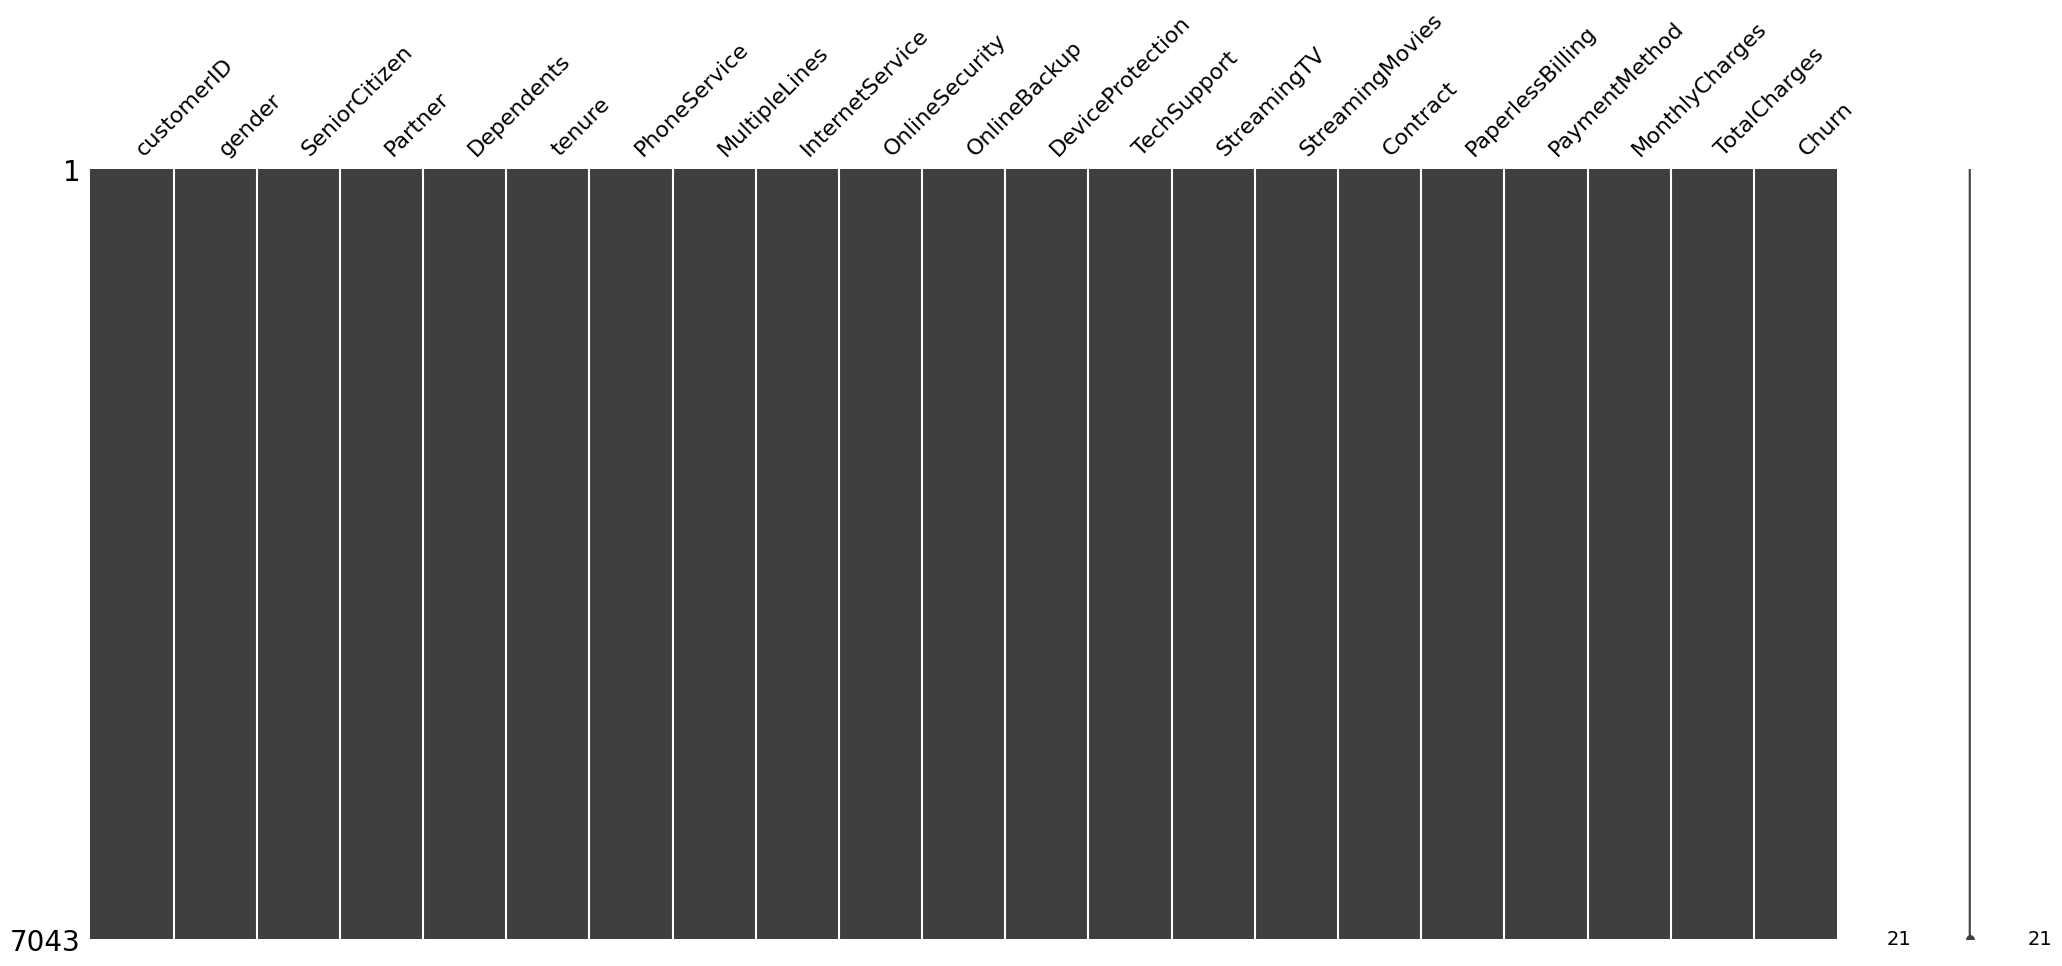

In [23]:
msno.matrix(df)

In [24]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Из приведенных выше визуализции и табицы мы можем видеть, что отсутствующих данных нет.

Избавимся от лишнего столбца (ID клиента)

In [25]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Не всё так гладко! При более глубоком анализе можно заметить, что в данных имеются некоторые пропуски в виде пробелов (столбец *TotalCharges*, представленный строковым типом данных). Посмотрим на это:

In [26]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Здесь видно, что столбец *TotalCharges* имеет 11 пропущенных значений. Взглянем на эти данные.

In [27]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Строки, где в столбце *Total Charges* пропуск, также имеют значение 0 в столбце *tenure* (срок подписки на оператора), хотя ежемесячные платежи (*MonthlyCharges*) для них присутствуют. Проверим, есть ли иные строки с признаком *tenure*, равным нулю.

In [31]:
display(df[df['tenure'] == 0].index)
print(f"Всего {len(df[df['tenure'] == 0].index)} строк с tenure = 0")

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Всего 11 строк с tenure = 0


В обозначенном столбце больше нет путающих значений, следовательно, поскольку количество строк и сами они совпадают с количеством пропусков *TotalCharges*, мы можем удалить эти строки, и их удаление не повлияет на данные.

In [32]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

Проверим пропуски снова

In [33]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Переведем *SeniorCitizen* в строковый формат, чтобы позже визуализировать

In [34]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Проверим категории столбца *InternetService*

In [35]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


Описательная статистика для численных фичей

In [36]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Визуализация**

Распределение по полу и оттоку

In [39]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(),
                     name="Пол"), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(),
                     name="Отток"), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Распределение по полу и оттоку",
    annotations=[dict(text='Пол', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Отток', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.6 % клиентов поменяли компанию;
* Клиенты в 49.5 % женщины и в 50.5 % мужчины.

In [40]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,2544
Male,2619


In [41]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


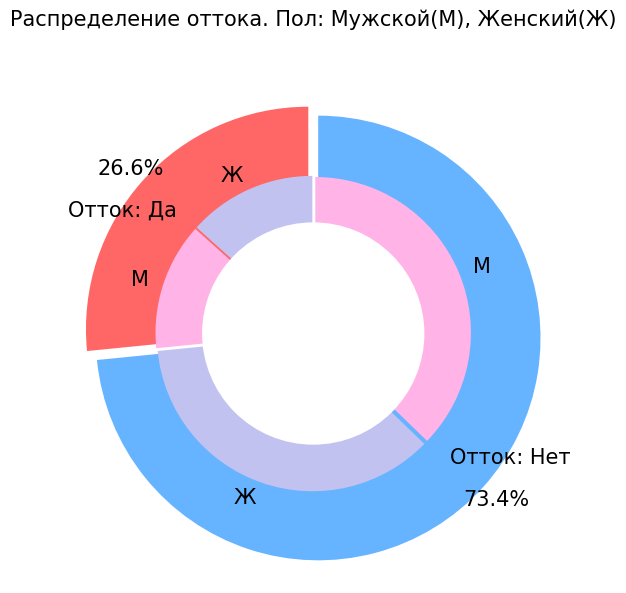

In [47]:
plt.figure(figsize=(6, 6))
labels =["Отток: Да","Отток: Нет"]
values = [1869,5163]
labels_gender = ["Ж","М","Ж","М"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Распределение оттока. Пол: Мужской(М), Женский(Ж)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

* Существует незначительная разница в процентах клиентов, обратившихся к поставщику услуг. Представители обоих полов вели себя схожим образом, когда дело доходило до перехода к другому поставщику услуг / фирме.

Распределение контракта клиентов

In [55]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group",
                   labels={'Churn': 'Отток', 'Contract': 'Тип контракта'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Тип контракта</b>",
    title="<b>Распределение контракта клиентов по оттоку</b>")
fig.show()

* Около 75% клиентов с месячным контрактом решили уволиться по сравнению с 13% клиентов с годичным контрактом и 3% с двухлетним контрактом.

Распределение метода оплаты

In [56]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Распределение метода оплаты</b>")
fig.show()

Распределение оттока по методу оплаты

In [60]:
fig = px.histogram(df, x="Churn", color="PaymentMethod",
                   title="<b>Распределение оттока по методу оплаты</b>",
                   labels={'Churn': 'Отток', 'PaymentMethod': 'Способ оплаты'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Способ оплаты</b>",
    title="<b>Распределение оттока по методу оплаты</b>")
fig.show()

* В основном клиенты, которые меняли компанию, использовали электронный чек в качестве способа оплаты.
* Клиенты, которые выбрали автоматический перевод по кредитной карте или банковский автоматический перевод и отправили чек по почте в качестве способа оплаты, с меньшей вероятностью покидали компанию.

Распределение оттока по используемому веб-сервису и полу

In [61]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [63]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [64]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [65]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Отток:Нет', 'Отток:Нет', 'Отток:Да', 'Отток:Да'],
       ["Женщина", "Мужчина", "Женщина", "Мужчина"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Отток:Нет', 'Отток:Нет', 'Отток:Да', 'Отток:Да'],
       ["Женщина", "Мужчина", "Женщина", "Мужчина"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Отток:Нет', 'Отток:Нет', 'Отток:Да', 'Отток:Да'],
       ["Женщина", "Мужчина", "Женщина", "Мужчина"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Распределение оттока по используемому веб-сервису и полу</b>")

fig.show()

* Многие клиенты выбирают услуги по оптоволокну, и также очевидно, что у клиентов, пользующихся оптоволокном, высокий уровень оттока, что может свидетельствовать о неудовлетворенности этим видом интернет-услуг.
* Большинство клиентов, пользующихся услугами DSL, имеют меньший уровень оттока по сравнению с услугами по оптоволокну.

Распределение оттока по наличию иждивенцев

In [68]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group",
                   title="<b>Распределение оттока по наличию иждивенцев</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'Dependents': 'Наличие иждивенцев'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Наличие иждивенцев</b>",
    title="<b>Распределение оттока по наличию иждивенцев</b>")
fig.show()

* Клиенты, не имеющие иждивенцев, с большей вероятностью поменяют компанию

Распределение оттока по наличию партнеров

In [69]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group",
                   title="<b>Распределение оттока по наличию партнеров</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'Partner': 'Наличие партнера'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Наличие партнера</b>",
    title="<b>Распределение оттока по наличию партнеров</b>")
fig.show()

* Клиенты, у которых нет партнеров, с большей вероятностью будут менять компанию

Распределение оттока по возрасту

In [70]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen",
                   title="<b>Распределение оттока по возрасту</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'SeniorCitizen': 'Пожилой житель'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Пожилой житель</b>",
    title="<b>Распределение оттока по возрасту</b>")
fig.show()

* Можно заметить, что доля пжилых жителей довольно мала
* Большая часть пожилых жителей меняет компанию

Распределение оттока по онлайн-безопасности

In [73]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group",
                   title="<b>Распределение оттока по онлайн-безопасности</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'OnlineSecurity': 'Онлайн-безопасность'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Онлайн-безопасность</b>",
    title="<b>Распределение оттока по онлайн-безопасности</b>")
fig.show()

* Значительная часть пользователей уходит из-за отсутствия онлайн-безопасности

Распределение оттока по безбумажному выставлению счетов

In [74]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",
                   title="<b>Распределение оттока по безбумажному выставлению счетов</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'PaperlessBilling': 'Безбумажное выставление счетов'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Безбумажное выставление счетов</b>",
    title="<b>Распределение оттока по безбумажному выставлению счетов</b>")
fig.show()

Распределение оттока по наличию технической поддержки

In [75]:
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group",
                   title="<b>Распределение оттока по наличию технической поддержки</b>",
                   labels={'Churn': 'Отток', 'TechSupport': 'Наличие тех. поддержки'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Наличие тех. поддержки</b>",
    title="<b>Распределение оттока по наличию технической поддержки</b>")
fig.show()

* Клиенты без технической поддержки, вероятно, уйдут к другому поставщику услуг.

Распределение оттока по телефонной связи

In [76]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService",
                   title="<b>Распределение оттока по телефонной связи</b>",
                   color_discrete_map=color_map,
                   labels={'Churn': 'Отток', 'PhoneService': 'Телефонная связь'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_xaxes(title_text="<b>Отток</b>")
fig.update_yaxes(title_text="<b>Количество клиентов</b>")
fig.update_layout(
    legend_title_text="<b>Телефонная связь</b>",
    title="<b>Распределение оттока по телефонной связи</b>")
fig.show()

* Очень небольшая часть клиентов не имеет телефонной связи. Из-за этого можно сказать, что треть клиентов с большей долей вероятности разорвут контракт.

Распределение ежемесячных платежей по оттоку

Text(0.5, 1.0, 'Распределение ежемесячных платежей по оттоку')

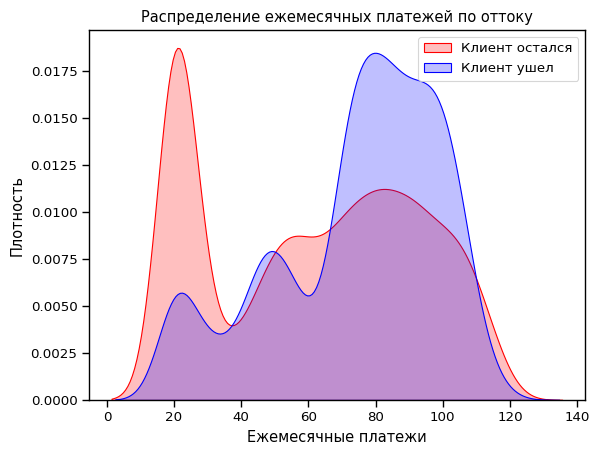

In [84]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')],
                ax =ax, color="Blue", shade= True)
ax.legend(["Клиент остался","Клиент ушел"],loc='upper right')
ax.set_ylabel('Плотность')
ax.set_xlabel('Ежемесячные платежи')
ax.set_title('Распределение ежемесячных платежей по оттоку')

* Клиенты с более высокими ежемесячными платежами также более склонны к оттоку.

Распределение общих платежей по оттоку

Text(0.5, 1.0, 'Распределение общих платежей по оттоку')

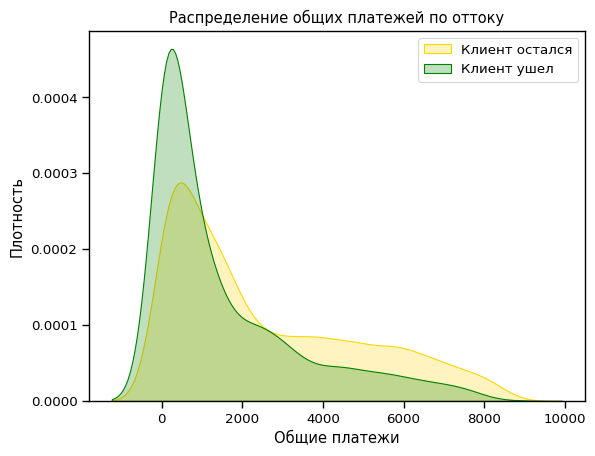

In [85]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')],
                color="Gold", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')],
                ax =ax, color="Green", shade= True)
ax.legend(["Клиент остался","Клиент ушел"],loc='upper right')
ax.set_ylabel('Плотность')
ax.set_xlabel('Общие платежи')
ax.set_title('Распределение общих платежей по оттоку')

Срок подписки - Отток

In [88]:
fig = px.box(df, x='Churn', y = 'tenure')

fig.update_yaxes(title_text='Срок подписки (мес.)', row=1, col=1)
fig.update_xaxes(title_text='Отток', row=1, col=1)

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Срок подписки - Отток</b>',
)

fig.show()

* Новые клиенты более подвержены к оттоку



##Предобработка

Создадим корреляционную матрицу

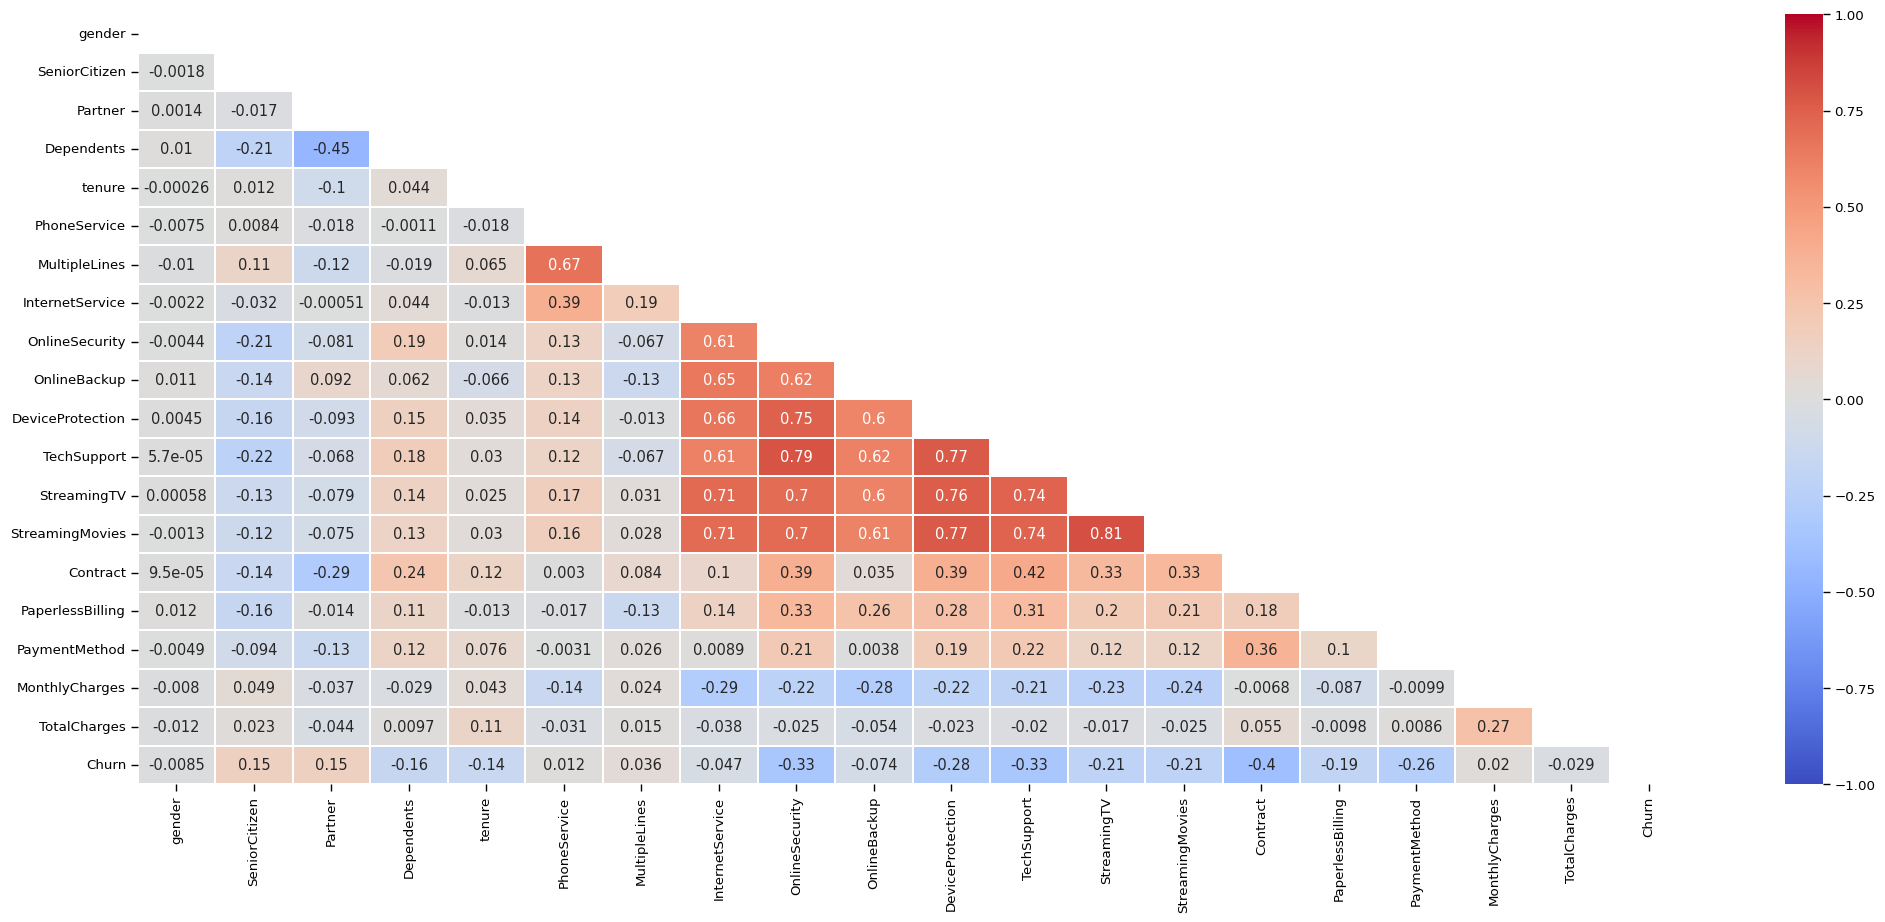

In [91]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns,
                 yticklabels=corr.columns, annot=True, linewidths=.2,
                 cmap='coolwarm', vmin=-1, vmax=1)

**Разобьем данные на тренировочную и тестовую части**

Проведем энкодинг категориальных признаков

In [94]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [95]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Корреляции для оттока

In [97]:
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


Разделение на train/test

In [98]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [99]:
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size = 0.30, random_state = 40, stratify=y)

In [107]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Распределение для {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
    ax.set_ylabel('Плотность')

Распределение численных фичей

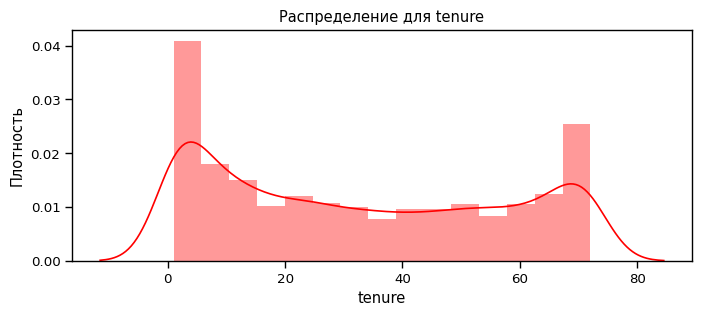

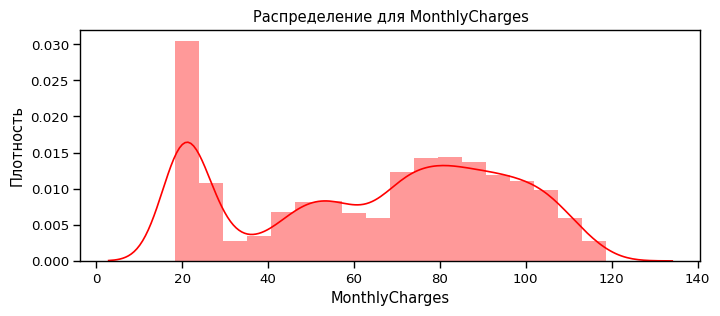

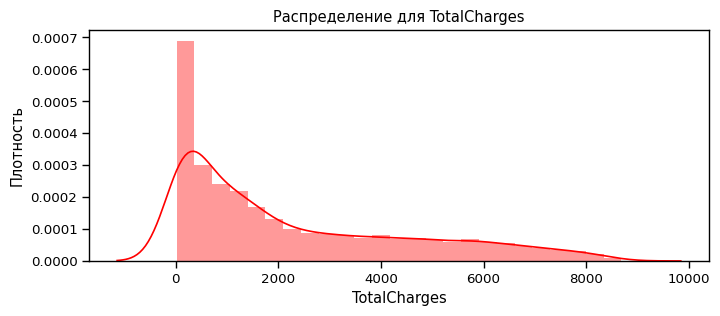

In [108]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Поскольку числовые характеристики распределены по разным диапазонам значений, будем использовать стандартизацию (масштабирование), чтобы свести их к одному диапазону.

**Стандартизация числовых характеристик**

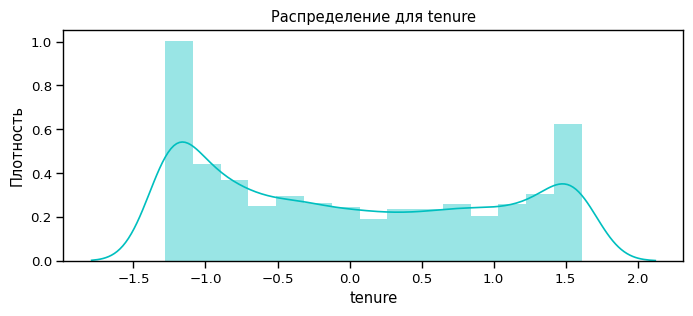

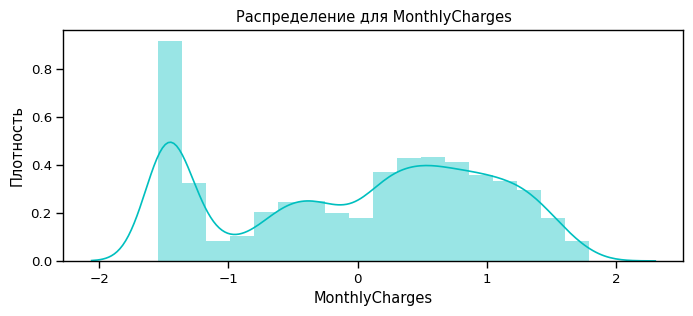

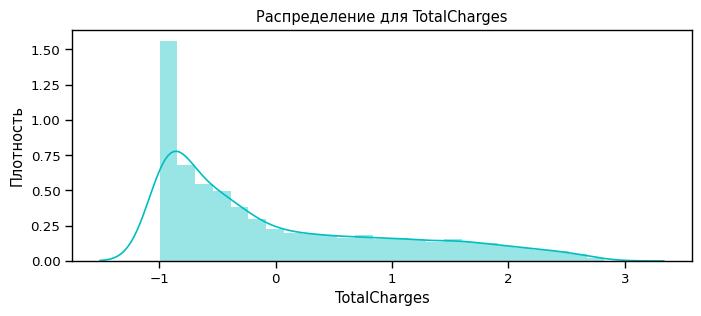

In [115]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

Разделение на категории, требующие label (у них всего два значения) и one hot энкодинги (больше двух значений)

In [118]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']  # one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))  # label encoding

In [122]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

##Перебор моделей и выявление лучшего решения

**KNN**

In [124]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [125]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



**SVC**

In [128]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVC accuracy:", accuracy_svc)

SVC accuracy: 0.8075829383886256


In [129]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



**Random Forest**

In [131]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [132]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



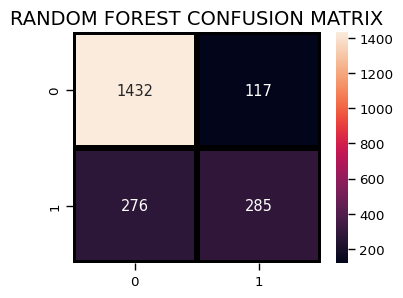

In [135]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

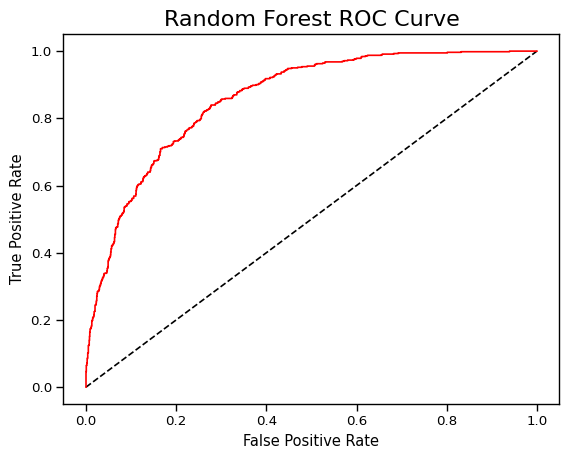

In [136]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

**Logistic Regression**

In [139]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy:", accuracy_lr)

Logistic Regression accuracy: 0.8090047393364929


In [140]:
lr_pred= lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



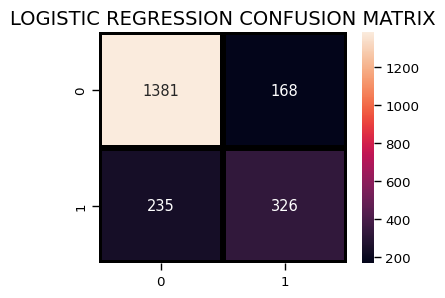

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Decision Tree Classifier**

In [137]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy:", accuracy_dt)

Decision Tree accuracy: 0.7293838862559242


In [138]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



**AdaBoost Classifier**

In [143]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy:",\
      metrics.accuracy_score(y_test, a_preds))

AdaBoost Classifier accuracy: 0.8075829383886256


In [144]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



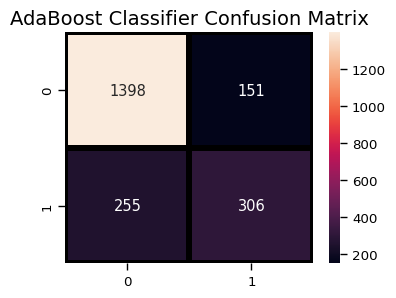

In [145]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d", linecolor="k", linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

**Gradient Boosting Classifier**

In [146]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [147]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



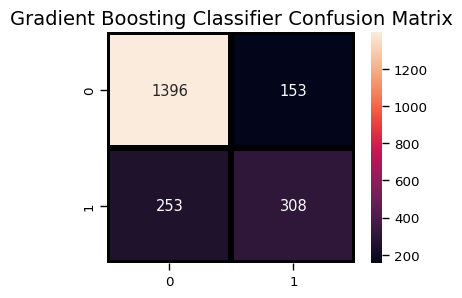

In [148]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

**Voting Classifier**

Итак, построим финальную модель на основании наибольшего количества голосов и оценим ее результаты.

In [152]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2),
                        ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Окончательный Accuracy Score ", accuracy_score(y_test, predictions))

Окончательный Accuracy Score  0.8165876777251185


In [153]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



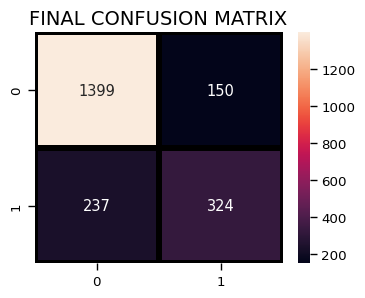

In [154]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d", linecolor="k", linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

Из confusion matrix мы можем видеть, что: Всего имеется 1400+149=1549 фактических значений, не связанных с оттоком, и алгоритм предсказывает, что 1400 из них не связаны с оттоком, а 149 - отток. В то время как существует 237+324=561 фактическое значение оттока, и алгоритм прогнозирует 237 из них как значения без оттока и 324 из них как значения оттока.